In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("email.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe

<bound method NDFrame.describe of             Category                                            Message
0                ham  Go until jurong point, crazy.. Available only ...
1                ham                      Ok lar... Joking wif u oni...
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...
3                ham  U dun say so early hor... U c already then say...
4                ham  Nah I don't think he goes to usf, he lives aro...
...              ...                                                ...
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

[5573 rows x 2 columns]>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [7]:
df = df.rename(columns={"Category": "label", "Message": "text"})   #Renaming “Category” → “label” for simplicity

In [8]:
df = df.dropna()

In [9]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5573, 2)

In [11]:
## Convert Labels to numbers
df["label"] = df["label"].map({"ham": 0 , "spam":1})  #This marks Spam as 1 and not spam as 0
df.head()

,label,text
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Remove empty, NaN, None labels
df = df.dropna()         

In [13]:
X = df["text"]
y = df["label"]

##Train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [14]:
## as machine does not unsertand human language
# we have to convert it to machine language
# Hare we are using TFidf to convert text to numbers

tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
## Now Training Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=2000)

In [16]:
y_pred = model.predict(X_test_tfidf)

In [17]:
## Now Checking Accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))

#print("\n Classification Report: ", classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:", cm)

Accuracy: 0.9662598707824839

Confusion Matrix: [[1206    0]
 [  47  140]]


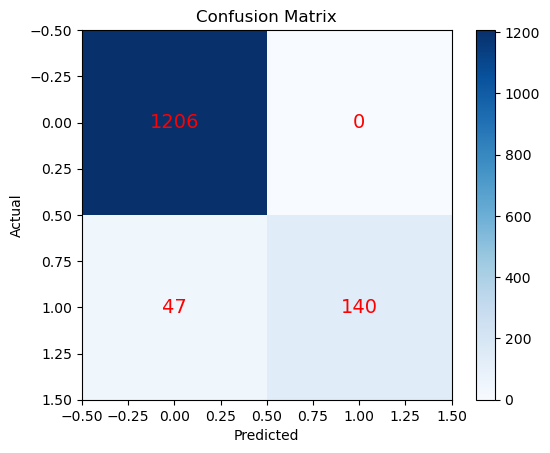

In [18]:
## Confusion Matrix Visualization
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red", fontsize=14)

plt.colorbar()
plt.show()

In [19]:
## Top Spamming Words
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

# Top 20 spam indicator words
top_spam_idx = np.argsort(coefficients)[-20:]

print("\nTop Words Indicating SPAM:\n")
for idx in reversed(top_spam_idx):
    print(feature_names[idx], ":", coefficients[idx])



Top Words Indicating SPAM:

txt : 4.403387742448607
claim : 3.377809359588561
uk : 3.3416377026627457
www : 3.3275256802740074
stop : 3.2776994514956885
mobile : 3.2771122216596154
reply : 3.1148238741262286
service : 3.005897619156289
150p : 2.864460933508433
free : 2.716822876312637
prize : 2.5554708694224257
text : 2.4959084944923178
com : 2.40246344993887
urgent : 2.358057528352301
50 : 2.338568536757396
win : 2.3131621464169227
won : 2.2962076917096303
cash : 2.153762269293918
new : 1.9770417211710614
18 : 1.9625735749525848


In [20]:
## Top Not_Spam Words
top_ham_idx = np.argsort(coefficients)[:20]

print("\nTop Words Indicating NOT SPAM:\n")
for idx in top_ham_idx:
    print(feature_names[idx], ":", coefficients[idx])



Top Words Indicating NOT SPAM:

ok : -1.8013046642990587
ll : -1.6932794487307399
gt : -1.655529584016095
lt : -1.641477932236916
got : -1.3798507920065626
come : -1.3760078909491105
da : -1.3527837304445225
home : -1.3374923097577003
lor : -1.2342367157499676
sorry : -1.1628901892912107
good : -1.1437121278405082
hey : -1.0863792437304531
going : -1.0769501514038315
later : -1.0401435326462047
way : -0.9977793469104529
oh : -0.9345264997007844
happy : -0.9158124556367562
yeah : -0.9132987038707958
wat : -0.8876611920624112
sir : -0.8774803785443237


In [21]:
## Predicting if email is spam or not
# Example email to check
new_email = ["Congratulations! You won a free prize. Click here to claim."]

# Convert to TF-IDF
new_email_tfidf = tfidf.transform(new_email)

# Predict
prediction = model.predict(new_email_tfidf)

# Result
if prediction[0] == 1:
    print("Prediction: SPAM")
else:
    print("Prediction: NOT SPAM")

Prediction: SPAM


In [22]:
## Checking Multiple Emails
emails = [
    "Let's meet tomorrow at 6 pm.",
    "WIN cash now!!! Claim your prize",
    "Are you coming home?",
    "Free entry in 2 lakh lottery"
]

emails_tfidf = tfidf.transform(emails)

preds = model.predict(emails_tfidf)

for text, p in zip(emails, preds):
    label = "SPAM" if p == 1 else "NOT SPAM"
    print(text, " --> ", label)

Let's meet tomorrow at 6 pm.  -->  NOT SPAM
WIN cash now!!! Claim your prize  -->  SPAM
Are you coming home?  -->  NOT SPAM
Free entry in 2 lakh lottery  -->  NOT SPAM
